# Starter imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from itertools import chain

In [ ]:
MovieRatingAvgPath = '/content/drive/MyDrive/Big Data Project/MovieRatingAvg'
BookRatingAvgPath = '/content/drive/MyDrive/Big Data Project/BookRatingAvg'
MovieDataPath = '/content/drive/MyDrive/Big Data Project/movies.csv'
BookDataPath = '/content/drive/MyDrive/Big Data Project/metadata.json'

# Import hadoop output files as dataframes




In [ ]:
# Average ratings per movie
with open(MovieRatingAvgPath, 'rb') as f:
  data = f.read().decode().splitlines()

dfMovieAvg = pd.DataFrame([x.split('\t') for x in data], columns=['movieId', 'AverageRating'])
print(dfMovieAvg.head())

  movieId AverageRating
0       1          3.89
1      10          3.42
2     100          3.22
3    1000          3.12
4  100001          2.67


In [ ]:
# Average ratings per book
with open(BookRatingAvgPath, 'rb') as f:
  data = f.read().decode().splitlines()

dfBookAvg = pd.DataFrame([x.split('\t') for x in data], columns=['item_id', 'AverageRating'])
print(dfBookAvg.head())

    item_id AverageRating
0   1000219          4.18
1   1001298          3.62
2  10017869          3.61
3  10018961          4.34
4  10018976          4.18


# Import GroupLens data as dataframes and merge

In [ ]:
# Merge rating and movie data to get titles
with open(MovieDataPath, 'r') as f:
    dfMovie = pd.read_csv(f)

mergedMovieData = pd.concat([dfMovieAvg[['movieId', 'AverageRating']], dfMovie[['movieId', 'title']]], axis=1)
mergedMovieData = mergedMovieData.loc[:,~mergedMovieData.columns.duplicated()]
print(mergedMovieData.head())

  movieId AverageRating                               title
0       1          3.89                    Toy Story (1995)
1      10          3.42                      Jumanji (1995)
2     100          3.22             Grumpier Old Men (1995)
3    1000          3.12            Waiting to Exhale (1995)
4  100001          2.67  Father of the Bride Part II (1995)


In [ ]:
# Merge rating and book data to get titles
import json
data = []
with open(BookDataPath, 'r') as f:
    for line in f:
        obj = json.loads(line)
        data.append(obj)

dfBook = pd.DataFrame(data)

mergedBookData = pd.concat([dfBookAvg[['item_id', 'AverageRating']], dfBook[['item_id', 'title']]], axis=1)
mergedBookData = mergedBookData.loc[:,~mergedBookData.columns.duplicated()]
print(mergedBookData.head())

    item_id AverageRating                                    title
0   1000219          4.18                   The Fault in Our Stars
1   1001298          3.62  The Hunger Games (The Hunger Games, #1)
2  10017869          3.61        Mockingjay (The Hunger Games, #3)
3  10018961          4.34                    The Girl on the Train
4  10018976          4.18     Catching Fire (The Hunger Games, #2)


# Machine learning stuff

In [ ]:

merged_by_title = pd.merge(mergedMovieData, mergedBookData, on=['title'], how='inner')
# # print(merged_by_title['AverageRating_x']) // Movie ratings that have the same name as book
# # print(merged_by_title['AverageRating_y']) //Book ratings that have the same name as movie
print(merged_by_title)
mergedMovieData_toTrain = merged_by_title[["AverageRating_x"]]
mergedBookData_toTrain = merged_by_title[["AverageRating_y"]]
X_train = mergedBookData_toTrain.to_numpy()
Y_train = mergedMovieData_toTrain.to_numpy()

print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)

X = mergedMovieData['title'].to_numpy()
y = mergedMovieData['AverageRating'].to_numpy()


print("Shape of X_train", X.shape)
print("Shape of Y_train", y.shape)



  movieId AverageRating_x              title   item_id AverageRating_y
0  185733            2.75         The Ritual    367095            4.07
1  188369            2.25   Ready Player One   1008111            4.01
2  207297            4.17            Freedom   1237325            3.97
3   27171            3.20  The Space Between  42694591            3.36
4    3957            2.96   The Glass Castle   1046035            3.35
5    4421            2.53             Cosmos    349532            3.82
6   49994            3.11            Genesis  24809605            3.94
7   91351            3.48    The Storyteller   1191096            4.27
8   91351            3.48    The Storyteller  45835034            4.32
9     NaN             NaN  In the Tall Grass     60390            3.54
Shape of X_train (10, 1)
Shape of Y_train (10, 1)
Shape of X_train (62423,)
Shape of Y_train (62423,)


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import keras.utils as ku
import tensorflow as tf
tf.random.set_seed(2)
from numpy.random import seed
seed(1)


In [ ]:
import string
import re
MovieTitles = mergedMovieData[["title"]]

#specify path for export
path = r'/content/drive/MyDrive/Big Data Project/my_data.txt'

#export DataFrame to text file
with open(path, 'a') as f:
    Movie_Titles_string = MovieTitles.to_string(header=False, index=False)
    f.write(Movie_Titles_string)
Movie_Titles_string = " ".join(line.strip() for line in Movie_Titles_string.splitlines())
print(Movie_Titles_string)


Toy Story (1995) Jumanji (1995) Grumpier Old Men (1995) Waiting to Exhale (1995) Father of the Bride Part II (1995) Heat (1995) Sabrina (1995) Tom and Huck (1995) Sudden Death (1995) GoldenEye (1995) American President, The (1995) Dracula: Dead and Loving It (1995) Balto (1995) Nixon (1995) Cutthroat Island (1995) Casino (1995) Sense and Sensibility (1995) Four Rooms (1995) Ace Ventura: When Nature Calls (1995) Money Train (1995) Get Shorty (1995) Copycat (1995) Assassins (1995) Powder (1995) Leaving Las Vegas (1995) Othello (1995) Now and Then (1995) Persuasion (1995) City of Lost Children, The (Cité des enfants perdus, La) (1995) Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Dangerous Minds (1995) Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Wings of Courage (1995) Babe (1995) Carrington (1995) Dead Man Walking (1995) Across the Sea of Time (1995) It Takes Two (1995) Clueless (1995) Cry, the Beloved Country (1995) Richard III (1995) Dead Presidents (1995) Restoration (1995) Morta

In [ ]:
def clean_text(text):
    pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
    text = re.sub(pattern, '', text)
    text = re.sub(r'\)', '', text)
    text = re.sub(r',', '', text)
    text = re.sub(r'\'', '',  text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'“', '', text)
    text = re.sub(r'”', '', text)
    text = re.sub(r'’', '', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r';', '', text)
    text = re.sub(r':', '', text)
    text = re.sub(r'\-', '', text)
    text = re.sub(r' i', '', text)
    text = re.sub(r' ii', '', text)
    text = re.sub(r' I', '', text)
    text = re.sub(r' II', '', text)
    text = text.split("\n")
    

    return text


In [ ]:
lower_data = Movie_Titles_string.lower() 
split_data = lower_data.splitlines()
print(split_data) 
Movie_Titles_string2 = clean_text(Movie_Titles_string)
Movie_Titles_string_split = []
# Movie_Titles_string2 = list(chain.from_iterable(Movie_Titles_string2))
for seq in Movie_Titles_string2:
    Movie_Titles_string_split.append(seq.split(" ) "))
Movie_Titles_string_split = list(chain.from_iterable(Movie_Titles_string_split ))     # splitting again to get list of cleaned and splitted data ready to be processed



['toy story (1995) jumanji (1995) grumpier old men (1995) waiting to exhale (1995) father of the bride part ii (1995) heat (1995) sabrina (1995) tom and huck (1995) sudden death (1995) goldeneye (1995) american president, the (1995) dracula: dead and loving it (1995) balto (1995) nixon (1995) cutthroat island (1995) casino (1995) sense and sensibility (1995) four rooms (1995) ace ventura: when nature calls (1995) money train (1995) get shorty (1995) copycat (1995) assassins (1995) powder (1995) leaving las vegas (1995) othello (1995) now and then (1995) persuasion (1995) city of lost children, the (cité des enfants perdus, la) (1995) shanghai triad (yao a yao yao dao waipo qiao) (1995) dangerous minds (1995) twelve monkeys (a.k.a. 12 monkeys) (1995) wings of courage (1995) babe (1995) carrington (1995) dead man walking (1995) across the sea of time (1995) it takes two (1995) clueless (1995) cry, the beloved country (1995) richard iii (1995) dead presidents (1995) restoration (1995) mor

In [ ]:
txt = " ".join(Movie_Titles_string_split)
txt = txt.split("(")
final_data_ = [] 
for word in txt:
  final_data_.append(word.lower())

In [ ]:
len(final_data_)

67109

In [ ]:
final_data_sample = final_data_[:10000]

In [ ]:
final_data_sample

['toy story ',
 ' jumanji ',
 ' grumpier old men ',
 ' waiting to exhale ',
 ' father of the bride parti ',
 ' heat ',
 ' sabrina ',
 ' tom and huck ',
 ' sudden death ',
 ' goldeneye ',
 ' american president the ',
 ' dracula dead and lovingt ',
 ' balto ',
 ' nixon ',
 ' cutthroatsland ',
 ' casino ',
 ' sense and sensibility ',
 ' four rooms ',
 ' ace ventura when nature calls ',
 ' money train ',
 ' get shorty ',
 ' copycat ',
 ' assassins ',
 ' powder ',
 ' leaving las vegas ',
 ' othello ',
 ' now and then ',
 ' persuasion ',
 ' city of lost children the ',
 'cité des enfants perdus la ',
 ' shanghai triad ',
 'yao a yao yao dao waipo qiao ',
 ' dangerous minds ',
 ' twelve monkeys ',
 'aka  monkeys ',
 ' wings of courage ',
 ' babe ',
 ' carrington ',
 ' dead man walking ',
 ' across the sea of time ',
 't takes two ',
 ' clueless ',
 ' cry the beloved country ',
 ' richardii ',
 ' dead presidents ',
 ' restoration ',
 ' mortal kombat ',
 ' to die for ',
 ' how to make an americ


 Most used words sketch 



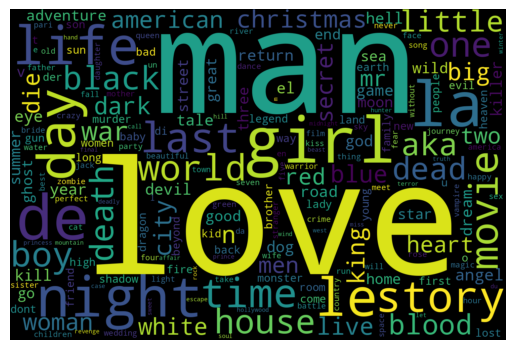

In [ ]:
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.python.util.tf_decorator import fullargspec_to_signature

print("\n Most used words sketch \n")

words = (" ").join([str(item) for item in final_data_])
wordcloud = WordCloud(width = 1500, height = 1000).generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_vocab = 100000
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(final_data_sample)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
words_to_index = tokenizer.word_index
print(len(words_to_index))
print(words_to_index)
vocab_size = len(words_to_index) + 1
print(vocab_size)


9135
{'the': 1, 'of': 2, 'a': 3, 'and': 4, 'to': 5, 'aka': 6, 'man': 7, 'la': 8, 'on': 9, 'love': 10, 'my': 11, 'de': 12, 'for': 13, 'from': 14, 'le': 15, 'with': 16, 'life': 17, 'night': 18, 'dead': 19, 'big': 20, 'last': 21, 'no': 22, 'story': 23, 'me': 24, 'you': 25, 'little': 26, 'at': 27, 'day': 28, 'house': 29, 'all': 30, 'time': 31, 'black': 32, 'movie': 33, 'death': 34, 'american': 35, 'city': 36, 'mr': 37, 'new': 38, 'one': 39, 'les': 40, 'men': 41, 'king': 42, 'n': 43, 'girl': 44, 'blue': 45, 'an': 46, 'world': 47, 'die': 48, 'two': 49, 'white': 50, 'girls': 51, 'red': 52, 'blood': 53, 'return': 54, 'out': 55, 'days': 56, 'that': 57, 'der': 58, 'high': 59, 'up': 60, 'three': 61, 'street': 62, 'summer': 63, 'lost': 64, 'your': 65, 'woman': 66, 'secret': 67, 'war': 68, 'way': 69, 'who': 70, 'home': 71, 'by': 72, 'boys': 73, 'star': 74, 'heart': 75, 'down': 76, 'about': 77, 'moon': 78, 'good': 79, 'best': 80, 'dr': 81, 'back': 82, 'under': 83, 'wild': 84, 'fire': 85, 'bad': 86, 

In [ ]:
input_seq = []
words_to_index = tokenizer.word_index
for line in final_data_sample:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

In [ ]:
input_seq

[[875, 23],
 [2965, 167],
 [2965, 167, 41],
 [716, 5],
 [716, 5, 2966],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 142],
 [210, 2, 1, 142, 211],
 [515, 4],
 [515, 4, 1702],
 [1189, 34],
 [35, 1703],
 [35, 1703, 1],
 [130, 19],
 [130, 19, 4],
 [130, 19, 4, 2968],
 [717, 4],
 [717, 4, 2972],
 [264, 1705],
 [876, 1706],
 [876, 1706, 186],
 [876, 1706, 186, 1190],
 [876, 1706, 186, 1190, 1191],
 [236, 187],
 [131, 2973],
 [1707, 516],
 [1707, 516, 446],
 [212, 4],
 [212, 4, 718],
 [36, 2],
 [36, 2, 64],
 [36, 2, 64, 132],
 [36, 2, 64, 132, 1],
 [2976, 133],
 [2976, 133, 719],
 [2976, 133, 719, 2977],
 [2976, 133, 719, 2977, 8],
 [517, 2978],
 [877, 3],
 [877, 3, 877],
 [877, 3, 877, 877],
 [877, 3, 877, 877, 2979],
 [877, 3, 877, 877, 2979, 2980],
 [877, 3, 877, 877, 2979, 2980, 2981],
 [296, 1709],
 [878, 879],
 [6, 879],
 [518, 2],
 [518, 2, 720],
 [19, 7],
 [19, 7, 615],
 [881, 1],
 [881, 1, 134],
 [881, 1, 134, 2],
 [881, 1, 134, 2, 31],
 [157, 616],
 [157, 616, 49],
 [519, 1],
 [519, 1, 88

In [ ]:
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)
for i in words_to_index:
  if(len(i) == max_seq_length):
    print(i)

16
missionmpossible
hostilententions
extraterrestrial


In [ ]:
input_seq = np.array(pad_sequences(input_seq, maxlen = max_seq_length, padding = 'pre'))
print(input_seq)

[[   0    0    0 ...    0  875   23]
 [   0    0    0 ...    0 2965  167]
 [   0    0    0 ... 2965  167   41]
 ...
 [   0    0    0 ...    0  139 2647]
 [   0    0    0 ...  139 2647    1]
 [   0    0    0 ... 2647    1  225]]


In [ ]:

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[   0    0    0 ...    0    0  875]
 [   0    0    0 ...    0    0 2965]
 [   0    0    0 ...    0 2965  167]
 ...
 [   0    0    0 ...    0    0  139]
 [   0    0    0 ...    0  139 2647]
 [   0    0    0 ...  139 2647    1]]
labels: [  23  167   41 ... 2647    1  225]


In [ ]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)
print(np.count_nonzero(ys == 0))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
163945845


In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 64)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)
model = Model(i,x)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 embedding (Embedding)       (None, 15, 64)            584704    
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 15, 520)           1216800   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 680)          2341920   
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 680)              0         
 lMaxPooling1D)                                              

In [ ]:

# model.load_weights("first_training.h5")


In [ ]:
r = model.fit(xs,ys,epochs=100)

Epoch 1/100
561/561 [==============================] - 28s 28ms/step - loss: 7.1944 - accuracy: 0.1636
Epoch 2/100
561/561 [==============================] - 9s 16ms/step - loss: 6.6596 - accuracy: 0.1656
Epoch 3/100
561/561 [==============================] - 8s 14ms/step - loss: 6.4337 - accuracy: 0.1709
Epoch 4/100
561/561 [==============================] - 8s 15ms/step - loss: 6.2972 - accuracy: 0.1766
Epoch 5/100
561/561 [==============================] - 8s 15ms/step - loss: 6.1749 - accuracy: 0.1827
Epoch 6/100
561/561 [==============================] - 9s 15ms/step - loss: 6.0371 - accuracy: 0.1912
Epoch 7/100
561/561 [==============================] - 8s 15ms/step - loss: 5.9363 - accuracy: 0.1963
Epoch 8/100
561/561 [==============================] - 8s 14ms/step - loss: 5.7488 - accuracy: 0.1990
Epoch 9/100
561/561 [==============================] - 9s 15ms/step - loss: 5.6225 - accuracy: 0.2019
Epoch 10/100
561/561 [==============================] - 8s 15ms/step - loss: 5.50

In [ ]:
model.save("second_training.h5")

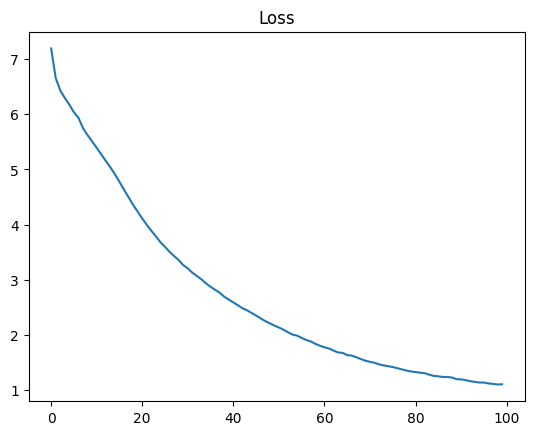

In [ ]:
import matplotlib.pyplot as plt
plt.title("Loss")
plt.plot(r.history['loss'])



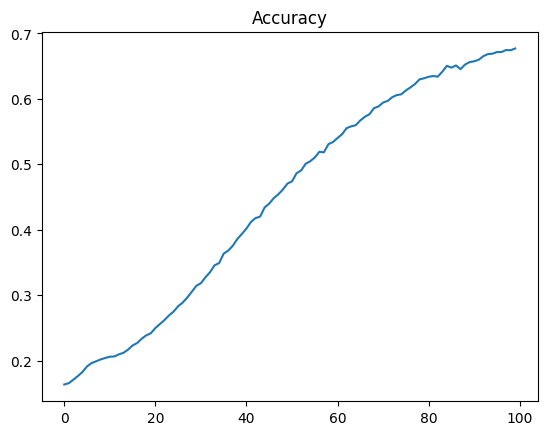

In [ ]:
plt.title("Accuracy")
plt.plot(r.history['accuracy'])

In [ ]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)
    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)



In [ ]:
seed_text = 'King'
next_words = 3


In [ ]:
predict_words(seed_text, next_words)

1/1 [==============================] - 0s 19ms/step
King of the ants
